# 3.a

a. Draw the possible decision boundary learned by svm model, and point out all the
support vectors.

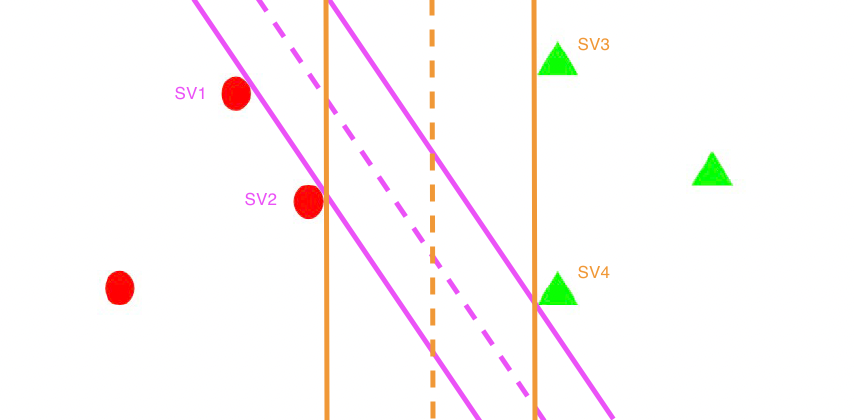

b. Does changing the support vectors change the decision boundary? Does changing the
non support vectors change the decision boundary?

Yes, We can see here that changing the suppport vectors to SV1, SV2 and SV4 would result in a smaller decision boundry with less margin.

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

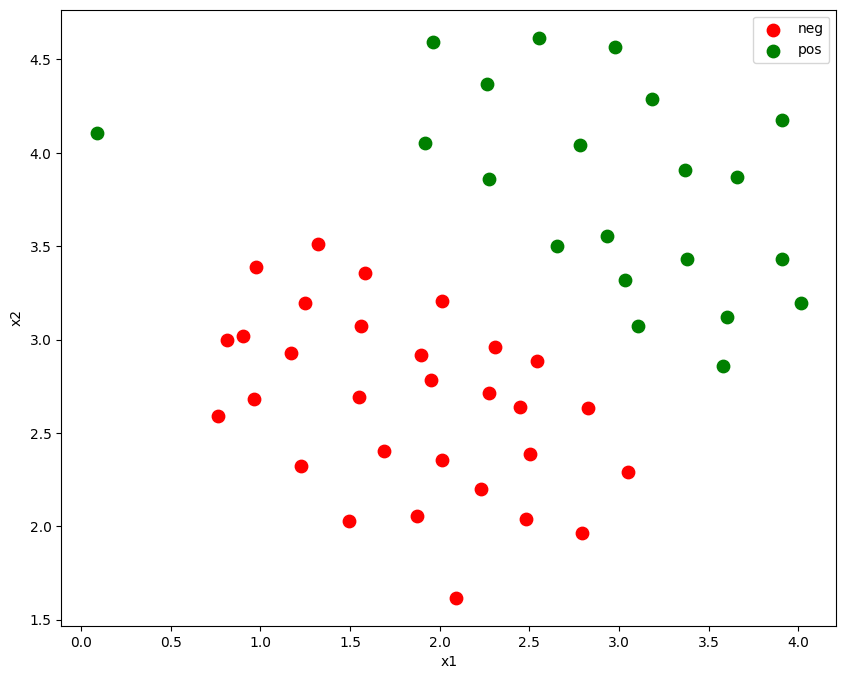

In [2]:
import utils 
from sklearn import preprocessing, metrics

############################################################################
#  Loading and Visualizing Data                                            #
#  We start the exercise by first loading and visualizing the dataset.     #
#  The following code will load the dataset into your environment and plot #
#  the data.                                                               #
############################################################################



X,y = utils.load_mat('data/ex4data1.mat')

utils.plot_twoclass_data(X,y,'x1', 'x2',['neg','pos'])
plt.show()

## Question 1 Implement SVM with sklearn

Implement SVM classifier to classify the dataset, and vary the value of C. What do you observe ?

Accuracy on training data, C=1 = 0.980
Accuracy on training data, C=5 = 1.000
Accuracy on training data, C=10 = 1.000


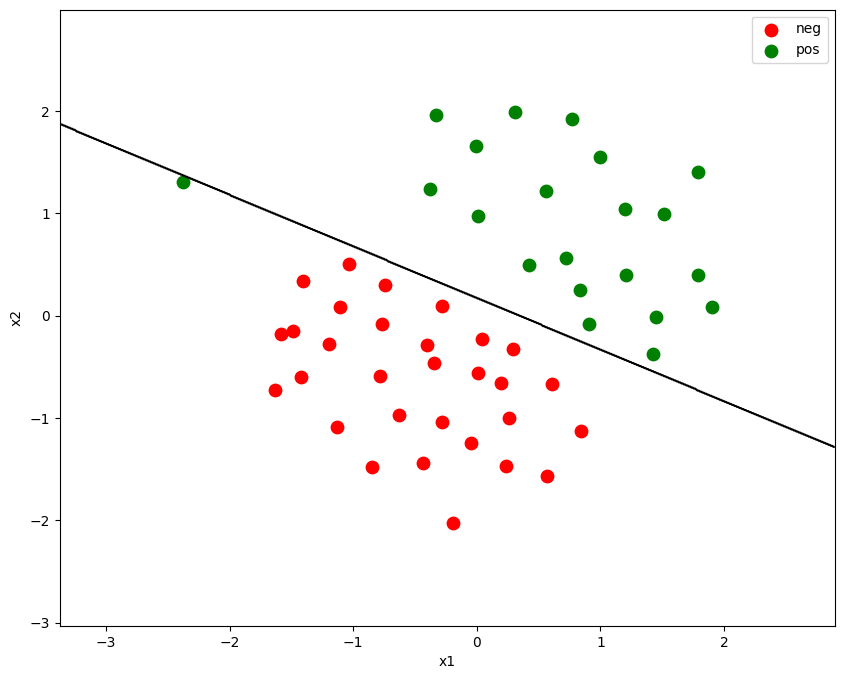

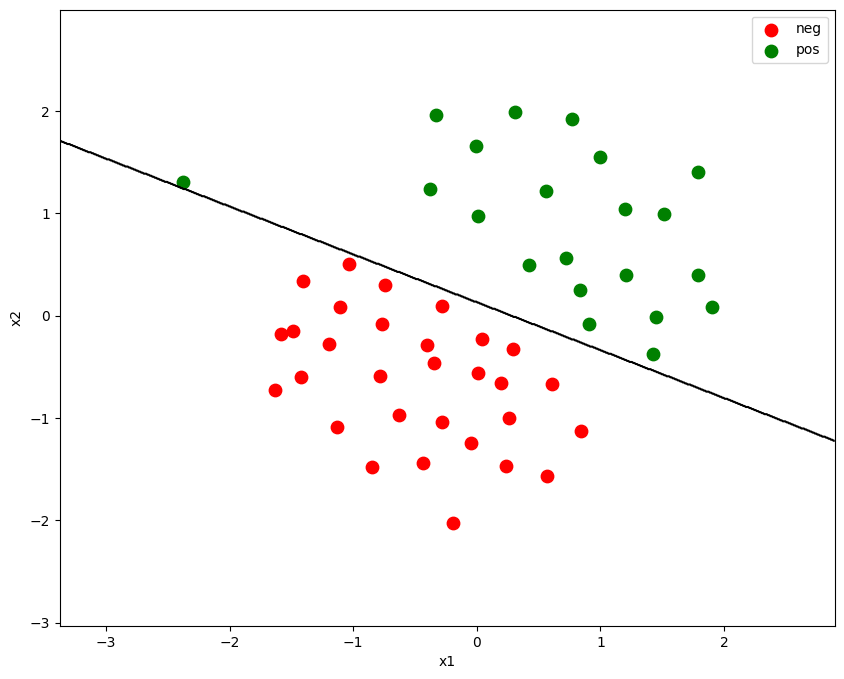

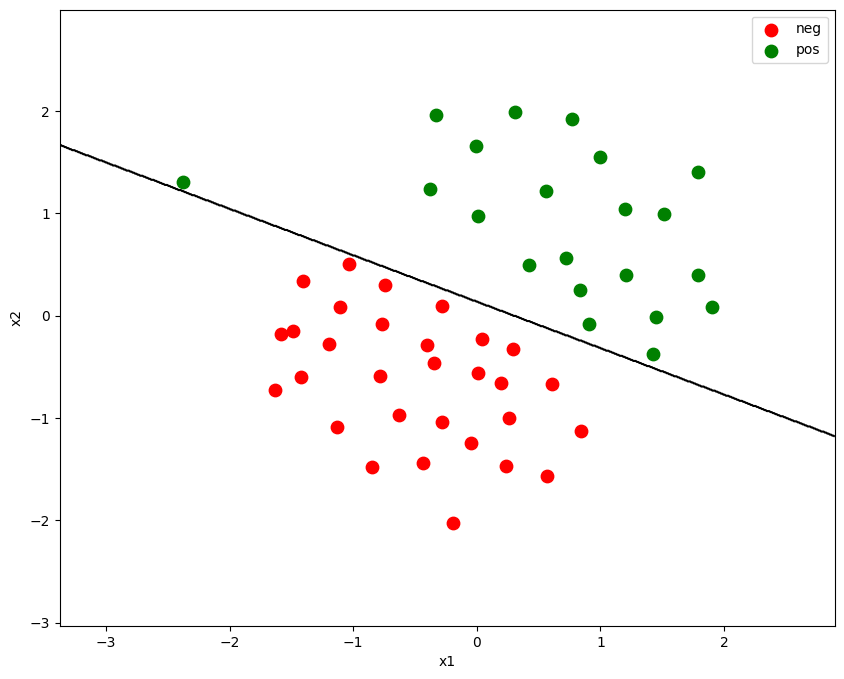

In [37]:
from sklearn.svm import LinearSVC
############################################################################
# Scale the data and set up the SVM training                               #
############################################################################

# scale the data
scaler = preprocessing.StandardScaler().fit(X)
scaleX = scaler.transform(X)

# add an intercept term and convert y values from [0,1] to [-1,1]

XX = np.array([(1,x1,x2) for (x1,x2) in scaleX])
yy = np.ones(y.shape)
yy[y == 0] = -1
yy[y == 0] = -1

############################################################################
#  Training linear SVM                                                     #
#  Train a linear SVM on the data set and the plot the learned             #
#  decision boundary                                                       #
############################################################################

############################################################################
# TODO :: You will change this line below to vary C.                       #
############################################################################
C_list = [1, 5, 10]
for C in C_list:
    # TODO :: define your svm classifier by using sklearn LinearSVC; expect 1 line of code
    svm = LinearSVC(C=C, dual=False, random_state=42)

    # TODO :: fit on your training data; expect 1 line of code
    svm.fit(XX, yy)



    # TODO :: classify the training data; expect 1 line of code
    y_pred = svm.predict(XX)

    print(f"Accuracy on training data, C={C} = %.3f" %metrics.accuracy_score(yy,y_pred))

    # visualize the decision boundarFy

    utils.plot_decision_boundary(scaleX,y,svm,'x1','x2',['neg','pos'])

AS we increase the value of C it seems that the model is attempting to distinctly seperate the data. This can cause overfitting.

## Question 2 Add PolynomialFeatures

Add polynomial features to the data and fit the LinearSVC with the new dataset.   Tune the degree of the feature interaction to make the model correctly classify all the data in training set.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Accuracy on training Polynomial SVM data = 1.000
Accuracy on training Kernel Poly SVM data = 1.000
plot 1 = polynomial svm
plot 2 = polynomial kernel svm


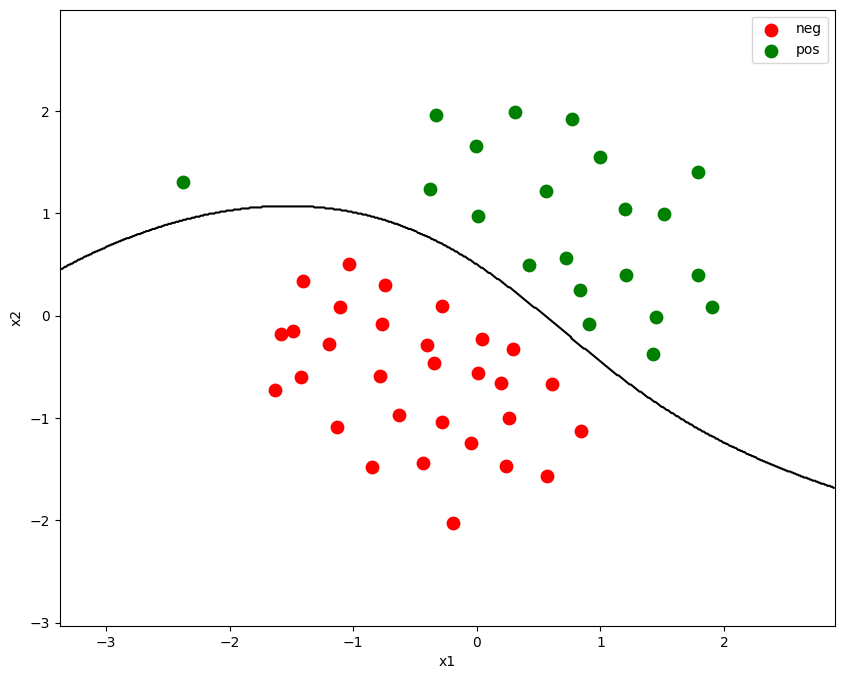

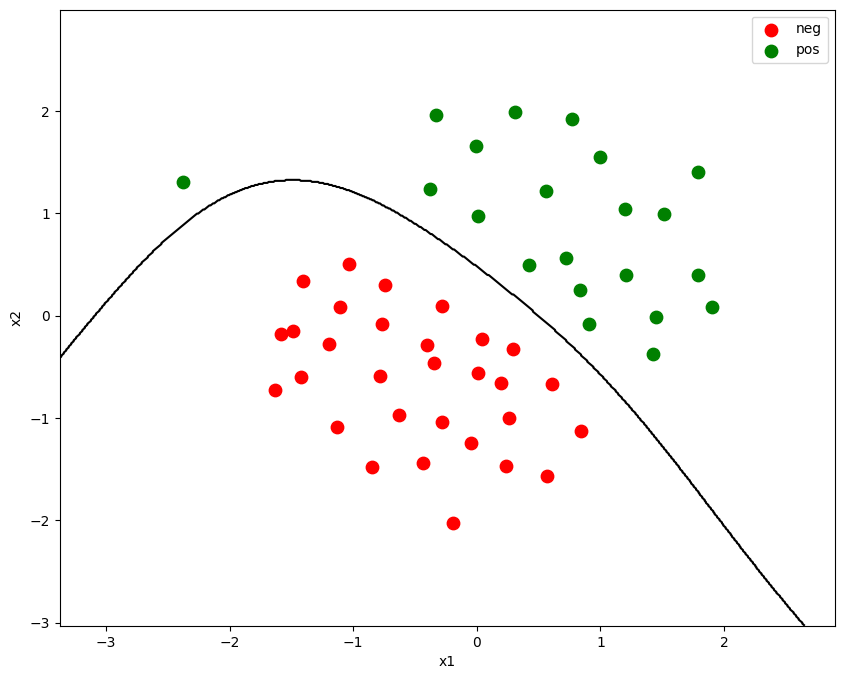

In [34]:
# TODO :: expect 13 - 15 lines of code
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC

polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", preprocessing.StandardScaler()),
        ("svm_clf", LinearSVC(C=.25, loss="hinge", random_state=42))
    ])

polynomial_svm_clf.fit(XX, yy)

y_pred_poly = polynomial_svm_clf.predict(XX)

poly_kernel_svm_clf = Pipeline([
        ("scaler", preprocessing.StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=5, coef0=1, C=1, random_state=42))
    ])

poly_kernel_svm_clf.fit(XX, yy)

y_pred_kernel = poly_kernel_svm_clf.predict(XX)

print("Accuracy on training Polynomial SVM data = %.3f" %metrics.accuracy_score(yy,y_pred_poly))
print("Accuracy on training Kernel Poly SVM data = %.3f" %metrics.accuracy_score(yy,y_pred_kernel))

print('plot 1 = polynomial svm')
utils.plot_decision_boundary(scaleX,y,polynomial_svm_clf,'x1','x2',['neg','pos'])

print('plot 2 = polynomial kernel svm')
utils.plot_decision_boundary(scaleX,y,poly_kernel_svm_clf,'x1','x2',['neg','pos'])